In [27]:
import pandas as pd

In [2]:
data = pd.read_csv("DEXCHUS-4.csv")

In [7]:
data.tail(n=50)

,DATE,DEXCHUS
1255,2017-01-30,6.8768
1256,2017-01-31,6.8768
1257,2017-02-01,6.8768
1258,2017-02-02,6.8768
1259,2017-02-03,6.8650
1260,2017-02-06,6.8600
1261,2017-02-07,6.8821
1262,2017-02-08,6.8700
1263,2017-02-09,6.8660
1264,2017-02-10,6.8775


In [1]:
from yahoo_finance import Currency

In [2]:
usd_rmb = Currency('USDCNY')

In [3]:
print usd_rmb.get_bid()

6.8834


In [4]:
usd_rmb.get_historical('2014-04-25', '2014-04-29')

AttributeError: 'Currency' object has no attribute 'get_historical'

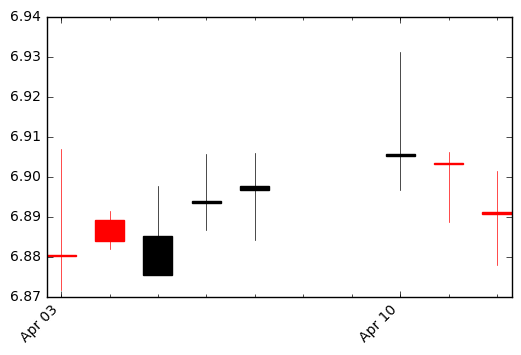

In [17]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc


# (Year, month, day) tuples suffice as args for quotes_historical_yahoo
date1 = (2017, 4, 1)
date2 = (2017, 4, 12)


mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

quotes = quotes_historical_yahoo_ohlc('CNY=X', date1, date2)
if len(quotes) == 0:
    raise SystemExit

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)

#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, quotes, width=0.6)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [20]:
quotes

[(736422.0,
  6.8803999999999998,
  6.9069000000000003,
  6.8718000000000004,
  6.8802000000000003,
  0.0),
 (736423.0,
  6.8891,
  6.8914999999999997,
  6.8819999999999997,
  6.8838999999999997,
  0.0),
 (736424.0,
  6.8754999999999997,
  6.8978000000000002,
  6.8754,
  6.8852000000000002,
  0.0),
 (736425.0,
  6.8933999999999997,
  6.9057000000000004,
  6.8867000000000003,
  6.8939000000000004,
  0.0),
 (736426.0,
  6.8967000000000001,
  6.9059999999999997,
  6.8841000000000001,
  6.8978000000000002,
  0.0),
 (736429.0,
  6.9051,
  6.9313000000000002,
  6.8967999999999998,
  6.9057000000000004,
  0.0),
 (736430.0,
  6.9034000000000004,
  6.9062000000000001,
  6.8887,
  6.9032999999999998,
  0.0),
 (736431.0,
  6.8910999999999998,
  6.9015000000000004,
  6.8780000000000001,
  6.8907999999999996,
  0.0)]

In [22]:
date3 = (2012, 4, 1)
date4 = (2017, 4, 1)
quotes0 = quotes_historical_yahoo_ohlc('CNY=X', date3, date4)

In [25]:
len(quotes0)

1303

In [41]:
dq0 = pd.DataFrame(quotes0)

In [42]:
dq0 = dq0.drop(dq0[[0]],axis=1)

In [44]:
dq0 = dq0.drop(dq0[[5]],axis=1)

In [50]:
a = pd.rolling_mean(dq0[[4]],10)

/Users/lingxiangyu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  if __name__ == '__main__':


In [51]:
plt.plot(a)

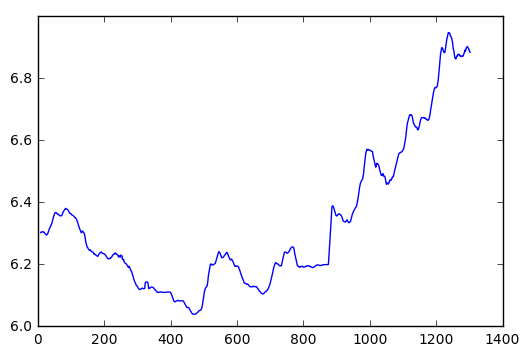

In [52]:
plt.show()

In [53]:
a

,4
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,6.30282
